In [2]:
from tabula.io import read_pdf
import numpy as np
import pandas as pd
from utils.functions import createfig_heatmap
import json

# Puerto Carreño

### Elegir el año de los informes

In [3]:
year_inform = "2019"

In [4]:
folder = f'informesIPSE{year_inform}'

if year_inform == "2019":
        pages ={1:[[482,(541,183,726,432)],[483,(131,177,340,445)]],
        2:[[514,(530,183,726,432)],[515,(131,177,340,445)]],
        3:[[527,(530,183,726,432)],[528,(131,177,340,445)]],
        4:[[499,(541,183,726,432)],[500,(131,177,340,445)]],
        5:[[529,(150,182,650,438)]],
        6:[[519,(150,182,650,438)]],
        7:[[502,(150,182,650,438)]],
        8:[[512,(200,183,726,432)]],
        9:[[501,(200,183,726,432)],[502,(131,177,200,445)]],
        10:[[529,(150,182,650,438)]],
        11:[[489,(541,183,726,432)],[490,(131,177,340,445)]],
        12:[[562,(220,182,650,438)]],
        }
elif year_inform == "2022":
        pages ={1:[[523,(150,182,650,438)]],
                2:[[475,(150,182,650,438)]],
                3:[[462,(150,182,650,438)]],
                4:[[532,(150,182,650,438)]],
                5:[[515,(150,182,650,438)]],
                6:[[108,(130,570,530,930)]],
                7:[[107,(130,570,530,930)]],
                8:[[114,(130,570,530,930)]],
                9:[[106,(141,574,520,916)]]}



### Leer tablas de los PDFs

In [5]:
pdf_table = {}

for i in pages.items():
    pdf_table[i[0]] = []
    for j in i[1]:       
        pdf_table[i[0]].append(read_pdf(input_path=f'{folder}/{i[0]}.pdf', pages=j[0], area=j[1])[0].dropna())
        filt_h = [True if ("Hora" in k) or ("hora" in k) or ("HORA" in k) else False for k in pdf_table[i[0]][-1].iloc[:,-1].to_numpy()]
        pdf_table[i[0]][-1] = pdf_table[i[0]][-1][filt_h]

### Unión de tablas y tratamiento de datos

In [6]:
#av_2019 = pd.DataFrame(index = pd.date_range(start="01/01/2019", end="31/12/2019", freq="1D"), columns = ["Av"])
av = pd.DataFrame(columns = ["Av"])
av_tem = []
for i in pdf_table.keys():
    for j in pdf_table[i]:
        av_tem.append(j.iloc[:,-1].to_list())
av_tem = np.concatenate(av_tem).flatten()

av["Av"] = av_tem

In [7]:
av_num = av.copy()

for k, item in enumerate(av.Av):
    item_sp = item.split(" ")
    if 'Minutos' in item_sp:
        av_num.iloc[k,0] = float(item_sp[0]) + float(item_sp[2])/60
    else:
        av_num.iloc[k,0] = float(item_sp[0])

av_num

,Av
0,24.0
1,22.25
2,24.0
3,24.0
4,24.0
...,...
360,24.0
361,24.0
362,18.75
363,24.0


Text(0, 0.5, 'Horas de disponibilidad')

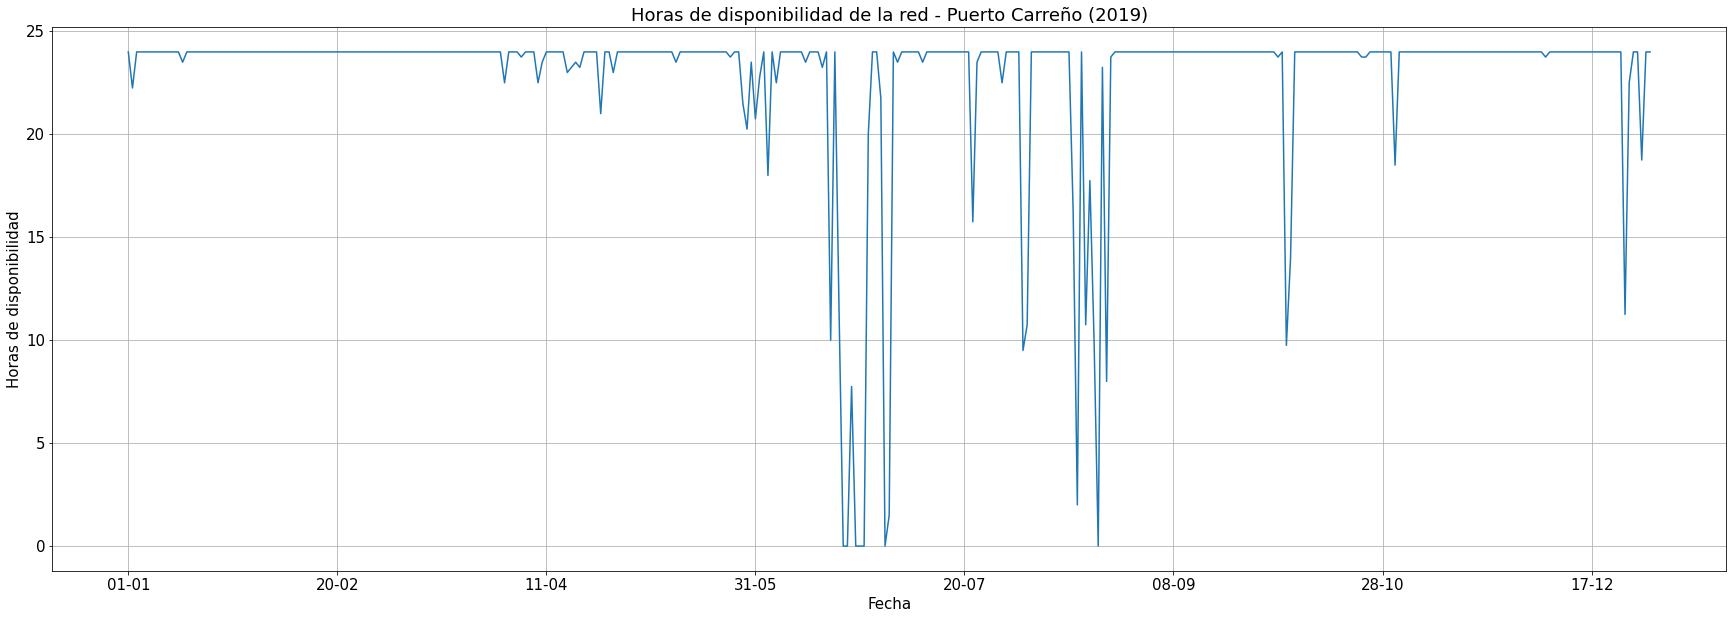

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(30,10))

indexx = av_num.index


#ax.plot(indexx[0:len(av_num)],av_num.Av)
ax.plot(indexx,av_num.Av)

date_form = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.grid()
ax.set_title("Horas de disponibilidad de la red - Puerto Carreño (2019)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Horas de disponibilidad")
#ax.legend([year_inform])

In [ ]:
from utils.scenario_creator import create_av_scens
av_scens, av_prob =  create_av_scens(av_num.Av.to_numpy(), seed = 15)

SAIDI: 7.258196721311475, SAIFI 61


In [10]:
av_scens[av_prob.keys()].to_csv(f'Escenarios/av_scens_PC.csv', index = False)
with open(f'Escenarios/av_prob_PC.json', "w") as fp:
    json.dump(av_prob,fp) 

In [11]:
for i in av_prob.keys():
    fig = createfig_heatmap(av_scens, i, True, '[1,0]')
    fig.show()

Displaying chart at http://localhost:22309/
Displaying chart at http://localhost:22309/


# San Andrés

### Año de los informes

In [2]:
year_inform = "2019"

In [26]:
folder = f'informesIPSE{year_inform}'

if year_inform == "2019":
        pages ={1:[[84,(150,182,650,438)]],
                2:[[90,(150,182,650,438)]],
                3:[[91,(220,182,720,438)]],
                4:[[85,(220,182,720,438)]],
                5:[[86,(220,182,720,438)]],
                6:[[85,(150,182,650,438)]],
        }

### Leer tablas de los PDF

In [27]:
pdf_table = {}

for i in pages.items():
    pdf_table[i[0]] = []
    for j in i[1]:       
        pdf_table[i[0]].append(read_pdf(input_path=f'{folder}/{i[0]}.pdf', pages=j[0], area=j[1])[0].dropna())
        filt_h = [True if ("Hora" in k) or ("hora" in k) or ("HORA" in k) else False for k in pdf_table[i[0]][-1].iloc[:,-1].to_numpy()]
        pdf_table[i[0]][-1] = pdf_table[i[0]][-1][filt_h]

In [28]:
pdf_table[5]

[   SAN ANDRÉS ( SAN ANDRÉS - ARCHIPIÉLAGO DE SAN ANDRÉS) Unnamed: 0
 3                                         01-May-2019      24 Horas
 4                                         02-May-2019      24 Horas
 5                                         03-May-2019      24 Horas
 6                                         04-May-2019      24 Horas
 7                                         05-May-2019      24 Horas
 8                                         06-May-2019      24 Horas
 9                                         07-May-2019      24 Horas
 10                                        08-May-2019      24 Horas
 11                                        09-May-2019      24 Horas
 12                                        10-May-2019      24 Horas
 13                                        11-May-2019      24 Horas
 14                                        12-May-2019      24 Horas
 15                                        13-May-2019      24 Horas
 16                               